In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

from src.data.data_loader import audio_loader
from src.data.h5_loader import load_h5


In [2]:
y, sr = librosa.load(librosa.ex('trumpet'))

117601

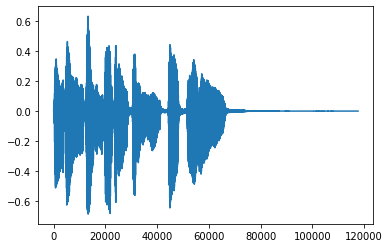

In [3]:
plt.plot(y)
len(y)

In [4]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

C:\Users\Caléo\AppData\Local\Temp\ipykernel_18488\473892238.py:1: FutureWarning: Pass y=[-1.4068224e-03 -4.4607223e-04 -4.1098078e-04 ...  7.9623060e-06
 -3.0417003e-05  1.2765067e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
d:\Projetos_hd\tempo_estimation_emd\.venv\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


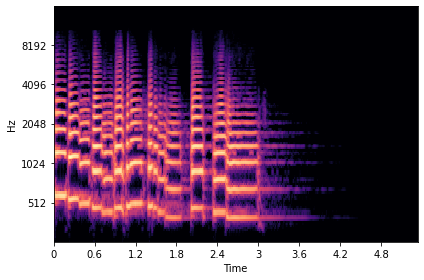

In [5]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   fmin=fmin,
                                   fmax=fmax,
                                   n_mels=n_mels)


plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.tight_layout()

In [6]:
odf_default = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=y, sr=sr, hop_length=hop_length,
                                           units='time')

In [7]:
odf_sf = librosa.onset.onset_strength(S=librosa.power_to_db(S, ref=np.max),
                                      sr=sr,
                                      hop_length=hop_length,
                                      lag=lag, max_size=max_size)

onset_sf = librosa.onset.onset_detect(onset_envelope=odf_sf,
                                      sr=sr,
                                      hop_length=hop_length,
                                      units='time')

In [8]:
onset_sf

array([0.05487528, 0.24444444, 0.41904762, 0.60362812, 0.93287982,
       1.10249433, 1.41678005, 1.66621315, 2.04535147, 2.21995465,
       2.36961451, 2.55419501, 3.03310658])

(1070,)


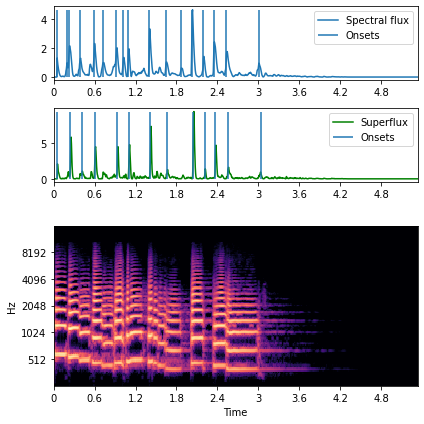

In [9]:
# sphinx_gallery_thumbnail_number = 2
plt.figure(figsize=(6, 6))

frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)

ax = plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                         y_axis='mel', x_axis='time', sr=sr,
                         hop_length=hop_length, fmin=fmin, fmax=fmax)
plt.axis('tight')


plt.subplot(4, 1, 1, sharex=ax)
plt.plot(frame_time, odf_default, label='Spectral flux')
plt.vlines(onset_default, 0, odf_default.max(), label='Onsets')
plt.legend()


plt.subplot(4, 1, 2, sharex=ax)
plt.plot(frame_time, odf_sf, color='g', label='Superflux')

print(odf_sf.shape)
plt.vlines(onset_sf, 0, odf_sf.max(), label='Onsets')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
S = librosa.feature.melspectrogram(y=y, sr=sr)

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

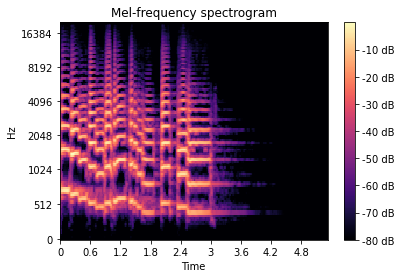

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=20000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [12]:
y_time = librosa.get_duration(y=y,sr=sr)
print(y_time)

f_odf = len(odf_sf)/y_time
print(f_odf)

spec_f = 230/y_time
print(spec_f)

5.333378684807256
200.6232940196087
43.12463329393458


(128, 230)


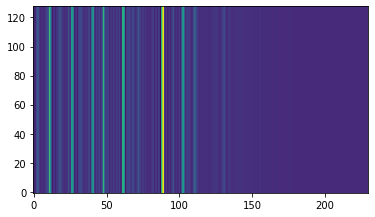

In [13]:
odf_sf_1 = odf_sf.reshape(1,-1)
odf_r = librosa.resample(odf_sf_1, orig_sr=f_odf, target_sr=spec_f)
odf_im = np.repeat(odf_r, 128,axis=0)
print(odf_im.shape)

plt.imshow(odf_im, origin='lower')

In [14]:
a = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(a, ref=np.max)

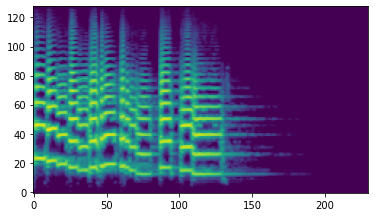

In [15]:
plt.imshow(S_dB, origin='lower')

In [16]:
from src.features.image_stack import ImageStack
imgstck = ImageStack(y=y,sr=sr)
image_stack = imgstck.create_image_stack()

In [17]:
image_stack.shape

(128, 230, 3)

In [18]:
aa = {'caleo':159}


KeyError: 0